In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\Assignment19062023\titanic_dataset .csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Do all the necessary pre-processing steps

In [6]:
#Making Passenger Id as index
data.set_index('PassengerId', inplace=True)

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.shape

(891, 11)

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Checking for missing values

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
D              3
              ..
A24            1
D46            1
D28            1
D48            1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [16]:
Age_median = data['Age'].median()
Cabin_mode = data['Cabin'].mode()[2]
Embarked_mode = data['Embarked'].mode()

In [17]:
#Filling in all the missing values with median and mode
data.fillna({
    'Age': data['Age'].mean(),               
    'Cabin': 'Unknown',                    
    'Embarked': data['Embarked'].mode()[0]  
}, inplace=True)

In [18]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# checking for Outliers

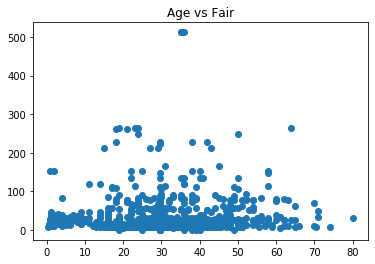

<Figure size 720x576 with 0 Axes>

In [19]:
#Scatter Plot for Age vs Fair
plt.scatter(data['Age'],data['Fare'])
plt.title('Age vs Fair')
plt.figure(figsize=(10, 8))
plt.show()

In [20]:
Age_above70 = data[data['Age']>70].index
Age_above70

Int64Index([97, 117, 494, 631, 852], dtype='int64', name='PassengerId')

In [21]:
Fare_above300 = data[data['Fare']>300].index
Fare_above300

Int64Index([259, 680, 738], dtype='int64', name='PassengerId')

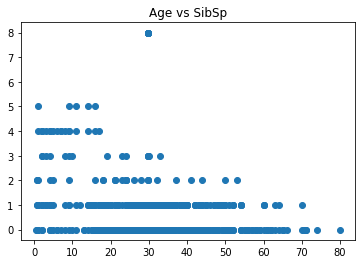

<Figure size 720x576 with 0 Axes>

In [22]:
#Scatter Plot for Age vs SibSp
plt.scatter(data['Age'],data['SibSp'])
plt.title('Age vs SibSp')
plt.figure(figsize=(10, 8))
plt.show()

In [23]:
SibSp_above7 = data[data['SibSp']>7].index
SibSp_above7

Int64Index([160, 181, 202, 325, 793, 847, 864], dtype='int64', name='PassengerId')

In [24]:
#Removing the outliers
data.drop([97, 117, 494, 631, 852,259, 680, 738,160, 181, 202, 325, 793, 847, 864])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S


In [25]:
data.shape

(891, 11)

# Remove irrelevant columns

In [27]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
data.drop(columns=columns_to_drop, inplace=True)

# One-hot encoding using pandas

In [28]:
data1 = pd.get_dummies(data, columns=['Sex', 'Embarked'])

In [29]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [30]:
data1.shape

(891, 11)

# Correlation Heatmap

In [32]:
corr_matrix = data1.corr()

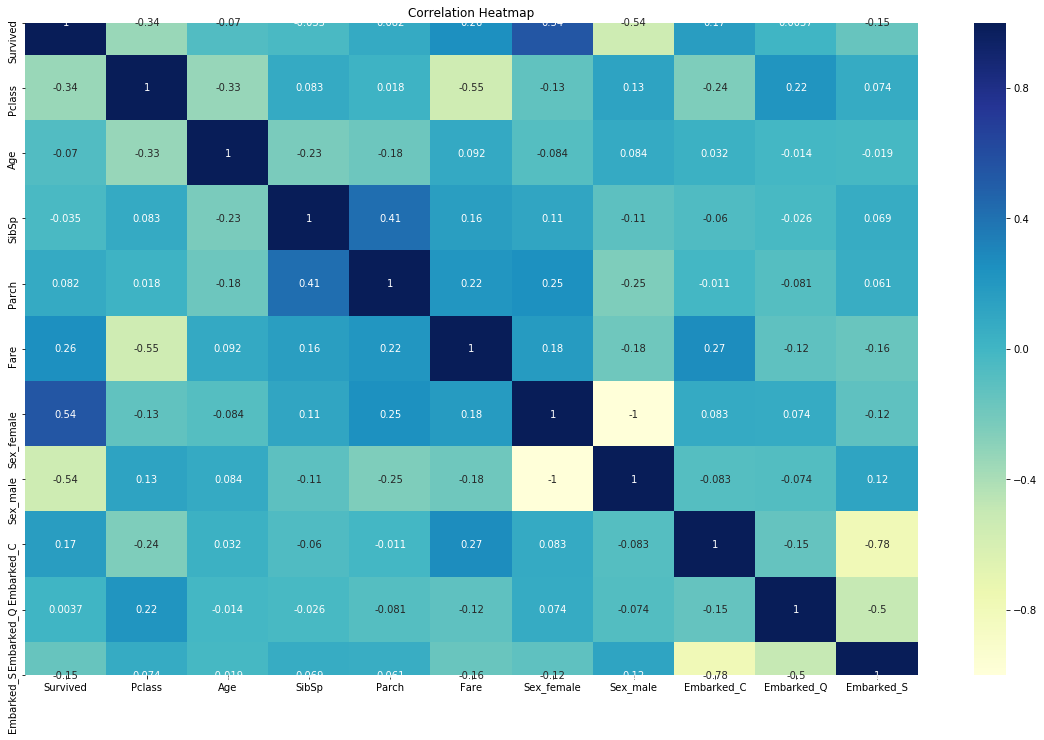

In [33]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix,annot=True,cmap = 'YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
x = data1.drop('Survived', axis=1)
y = data1['Survived']

# Min Max Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
min_max = MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [38]:
type(x)

numpy.ndarray

In [39]:
x=pd.DataFrame(x)

In [40]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.062858,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.418036,0.163383,0.137843,0.134343,0.096995,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# 3. Create kNN and SVM models

# SVM Model

In [43]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = svmclf.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.7847533632286996


In [46]:
print(confusion_matrix(y_test,y_pred))

[[112  22]
 [ 26  63]]


# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
knn_pred = knn.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, knn_pred)

In [52]:
accuracy

0.8026905829596412

# 4.  k-fold and stratified stratified k-fold cross validation techniques

# K Fold Cross validation

In [53]:
from sklearn.model_selection import KFold
kfold_validator =KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index: ',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [54]:
from sklearn.model_selection import cross_val_score ## to find score
cv_result = cross_val_score(svmclf,x,y,cv=kfold_validator)
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [68]:
print("K-Fold Cross Validation result for SVM model",np.mean(cv_result)*100)

K-Fold Cross Validation result for SVM model 78.6729088639201


In [69]:
cv_result = cross_val_score(svmclf,x,y,cv=kfold_validator)

In [70]:
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [65]:
print("K-Fold Cross Validation result for kNN model",np.mean(cv_result)*100)

K-Fold Cross Validation result for kNN model 78.6729088639201


# Stratified k-fold cross validation

In [66]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index: ',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [67]:
cv_result1 = cross_val_score(svmclf,x,y,cv=skfold_validator)
cv_result1

array([0.81111111, 0.78888889, 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76136364])

In [72]:
print("K-Fold Cross Validation result for SVM model",np.mean(cv_result1)*100)

K-Fold Cross Validation result for SVM model 78.66981613891727


In [73]:
cv_result1

array([0.81111111, 0.78888889, 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76136364])

In [74]:
print("K-Fold Cross Validation result for kNN model",np.mean(cv_result1)*100)

K-Fold Cross Validation result for kNN model 78.66981613891727
